In [1]:
#Importing Libraries
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D,Dropout,Dense
from tensorflow.keras import layers, optimizers, callbacks  
from sklearn.utils.class_weight import compute_class_weight  
from tensorflow.keras.applications import EfficientNetV2B2 
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
import gradio as gr


In [2]:
#Extracting Data
zip_path = "archive.zip"  

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

data_path = "TrashType_Image_Dataset"
print("✅ Dataset extracted.")

✅ Dataset extracted.



Showing samples for class: cardboard


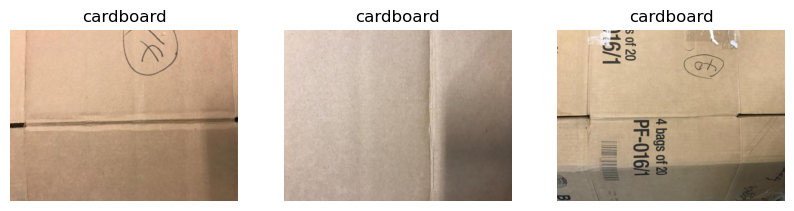


Showing samples for class: glass


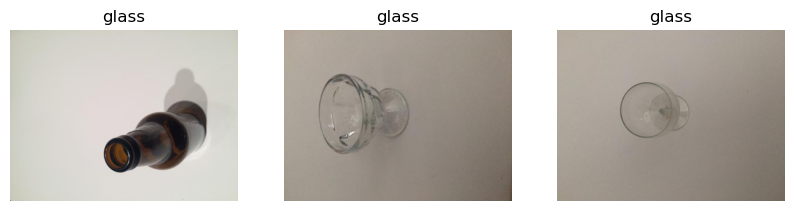


Showing samples for class: metal


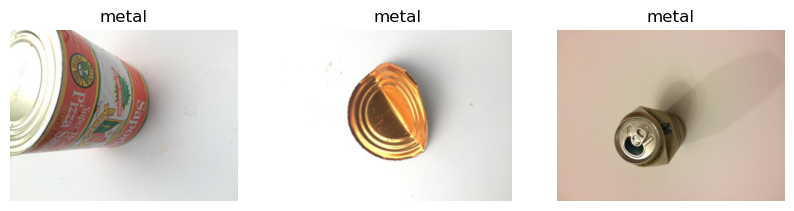


Showing samples for class: paper


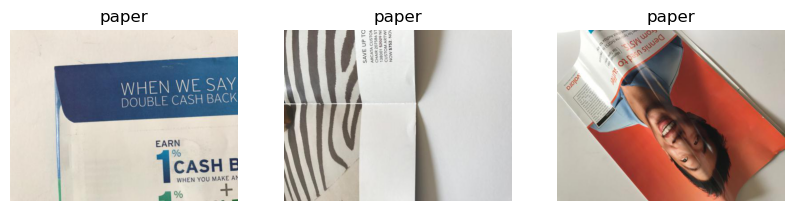


Showing samples for class: plastic


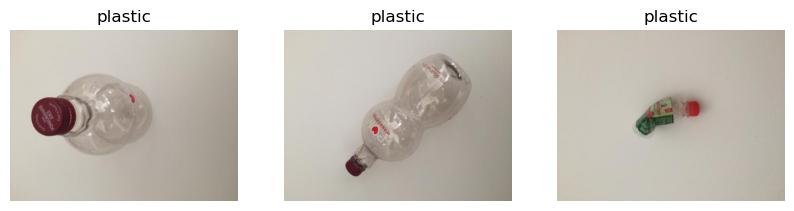


Showing samples for class: trash


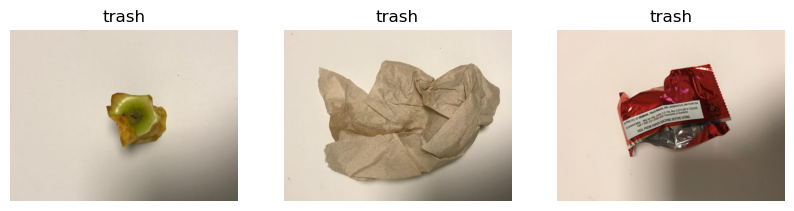

In [3]:
#View Samples
classes = os.listdir(data_path)

for class_name in classes:
    class_folder = os.path.join(data_path, class_name)
    image_files = os.listdir(class_folder)[:3]

    print(f"\nShowing samples for class: {class_name}")
    plt.figure(figsize=(10, 3))

    for i, img_name in enumerate(image_files):
        img_path = os.path.join(class_folder, img_name)
        img = plt.imread(img_path)

        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis("off")

    plt.show()

In [4]:
#Preprocessing and datasplit
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(260, 260),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=(260, 260),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


{'cardboard': 403, 'glass': 501, 'metal': 410, 'paper': 594, 'plastic': 482, 'trash': 137}


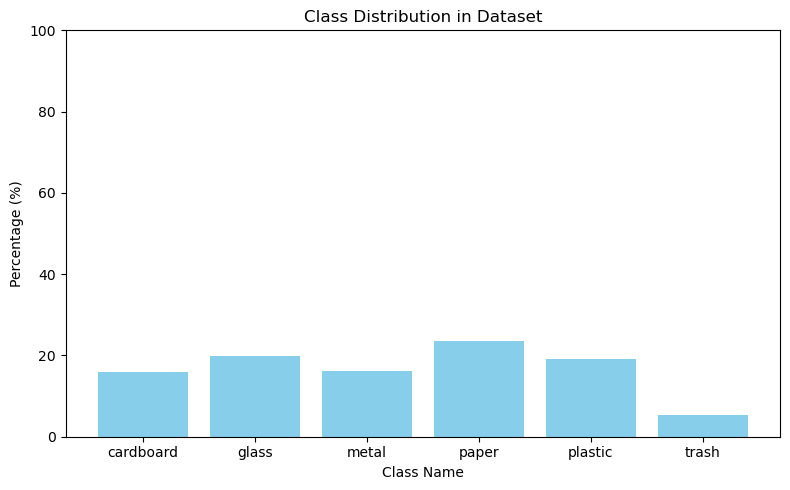

Class image counts: {'cardboard': 15.95, 'glass': 19.83, 'metal': 16.22, 'paper': 23.51, 'plastic': 19.07, 'trash': 5.42}


In [5]:
#Class distribution
class_counts = {}
total=0
for class_name in os.listdir(data_path):
    class_folder = os.path.join(data_path, class_name)
    if os.path.isdir(class_folder):
        class_counts[class_name] = len(os.listdir(class_folder))
        total+=len(os.listdir(class_folder))

print(class_counts)
for k in class_counts:
    class_counts[k]=round((class_counts[k]/total)*100,2)

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Class Distribution in Dataset")
plt.xlabel("Class Name")
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

print("Class image counts:", class_counts)


In [6]:
labels = train_generator.classes  # auto-generated labels from folder names
class_names = list(train_generator.class_indices.keys())

# Compute weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weights = dict(enumerate(class_weights_array))
print("Computed class weights:", class_weights)

Computed class weights: {0: 1.04437564499484, 1: 0.8412302576891105, 2: 1.0284552845528456, 3: 0.7086834733893558, 4: 0.8739205526770294, 5: 3.066666666666667}
